## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [1]:
y = 100
def fun_constructor():
    y = 10
    def g(x):
            return(x + y)     
    return(g)

## fun_constructor() creates functions
myfun = fun_constructor()
myfun(3)

13

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [3]:
def sample_cards(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [4]:
cards = sample_cards(100, 6, 3)
cards

array([[15, 23, 53],
       [ 3, 10, 77],
       [18, 41, 85],
       [81, 97, 99],
       [26, 34, 68],
       [ 2, 40, 80]])

and access the cards of each player with 

In [5]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([15, 23, 53]), array([ 3, 10, 77]))

The lowest card in the game is

In [6]:
np.min(cards)

2

In [7]:
np.arange(1, 5)

array([1, 2, 3, 4])

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

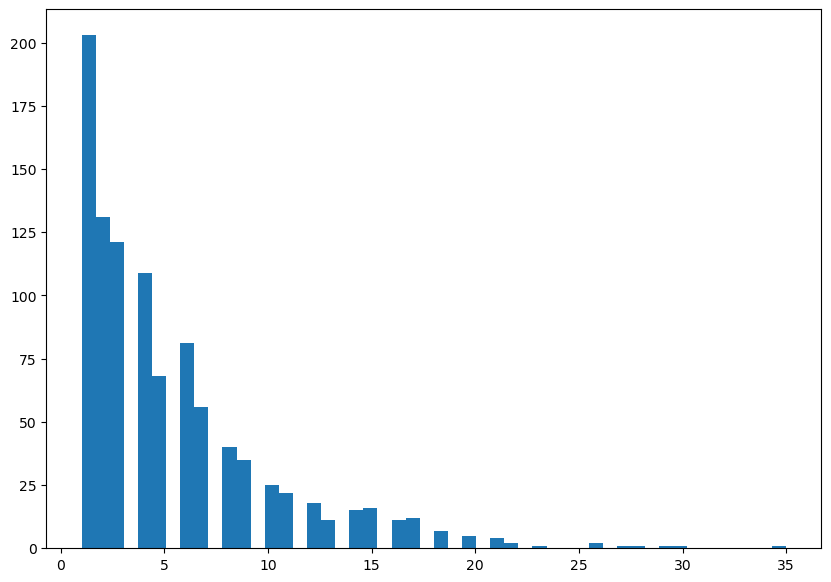

In [8]:
# To Do cell

def get_min(cards):
    return np.min(cards) 

# simulate multiple times
dist = np.arange(1000)
for i in np.arange(1000):
    cards = sample_cards(100, 6, 3)
    m = get_min(cards)
    dist[i] = m
    
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(dist, bins = 50)
 
plt.show()

### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

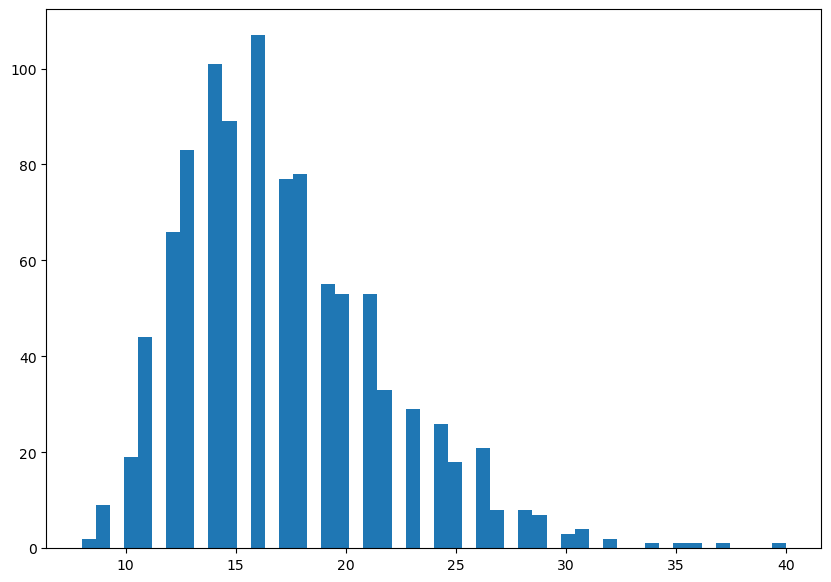

In [9]:
# To Do cell

cards = sample_cards(100, 6, 3)
cards


def large_gap(cards):
    '''
    Find the larges gap in cards
    
    Input: cards that generate from function sample_cards(N, n, k)
    Output: largest gap
    '''
    L = np.sort(cards.flatten())
    Dif = np.diff(L)
    return (np.max(Dif))


    
L_dist = np.arange(1000)
# simulate multiple times
for i in np.arange(1000):
    cards = sample_cards(100, 6, 3)
    L_dist[i] = large_gap(cards)
    
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(L_dist, bins = 50)
 
plt.show()
    

Repeat the experiment but know compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

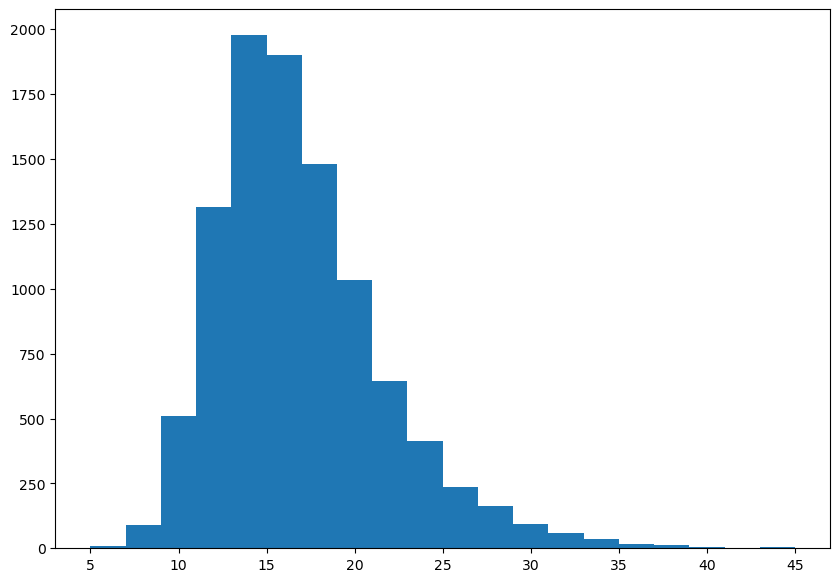

mean of the distribution:  16.4209


In [10]:
# To Do cell

def player_large_gap(cards, players_number, cards_number):
    '''
    compute the largest gap between cards of different players
    
    Input:
     cards: cards of the players
     players_number: number of the player in the game
     cards_number: number of cards per player
     
    Output:
     the largest gap between cards of different players
    '''

    player = np.repeat(np.arange(players_number), cards_number)

    L = cards.flatten()
    arg_sort = np.argsort(L)

    sort_L = L[arg_sort]
    Dif = np.diff(sort_L)

    final_list = np.array([])
    # check for different players
    player_id = player[arg_sort]
    player_diff = np.diff(player_id)
    # find the gaps
    final_list = Dif * (player_diff != 0)
    # return the largest gap
    return (max(final_list))
    
    
Diff_List = np.arange(10000)

players_number = 6
cards_number = 3
# simulate multiple times
for i in range(10000):
    cards = sample_cards(100, n = players_number, k = cards_number)
    Diff_List[i] = player_large_gap(cards, players_number, cards_number)
    
# ploting
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(Diff_List, bins = 20)
 
plt.show()
print("mean of the distribution: ", np.mean(Diff_List))

How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

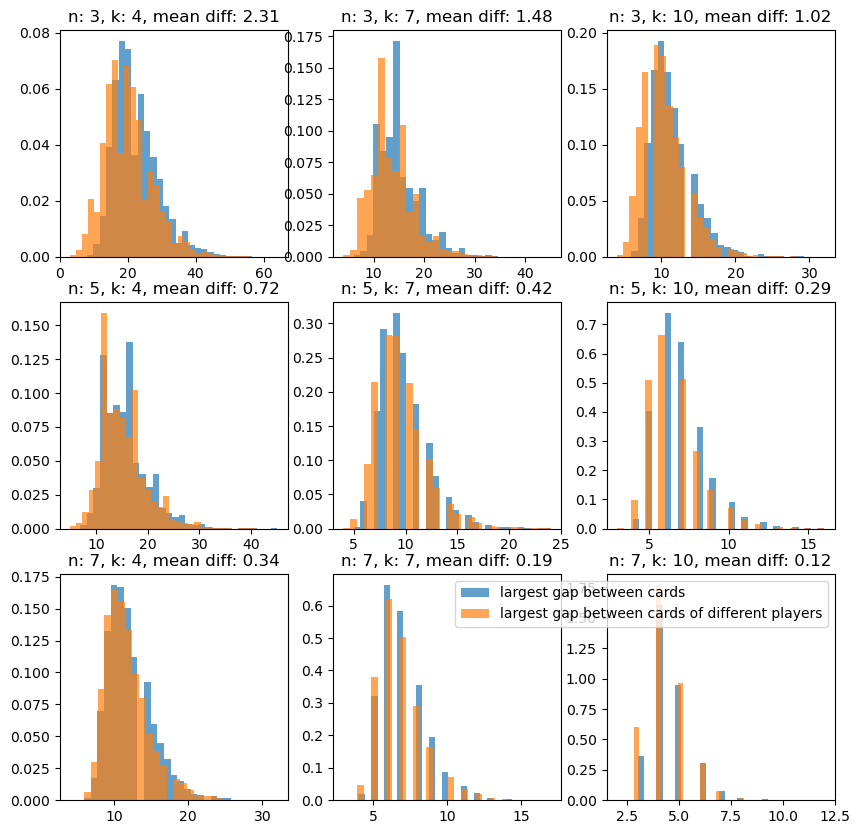

In [11]:
# To Do cell

players_number = np.array([3, 5, 7])
cards_number = np.array([4, 7, 10])

fig, axarr = plt.subplots(3, 3, figsize=(10, 10))

Diff_Matrix = np.arange(10000)
# generate plot for the combinations of different plyers number (n) and cards number (k)
for i in range(len(players_number)):
    for j in range(len(cards_number)):
        
        gap = np.arange(10000)
        p_gap = np.arange(10000)
        for k in range(10000):
            cards = sample_cards(100, n = players_number[i], k = cards_number[j])
            p_gap[k] = player_large_gap(cards, players_number[i], cards_number[j])
            gap[k] = large_gap(cards)

        avg_diff = abs(np.mean(gap) - np.mean(p_gap))
        axarr[i, j].hist(gap, density = True, bins=30, alpha = 0.7, label = "largest gap between cards")
        axarr[i, j].hist(p_gap, density = True, bins=30, alpha = 0.7, label = "largest gap between cards of different players")
        axarr[i, j].set_title(f'n: {players_number[i]}, k: {cards_number[j]}, mean diff: {round(avg_diff, 2)}')
    
plt.legend()
plt.show() 


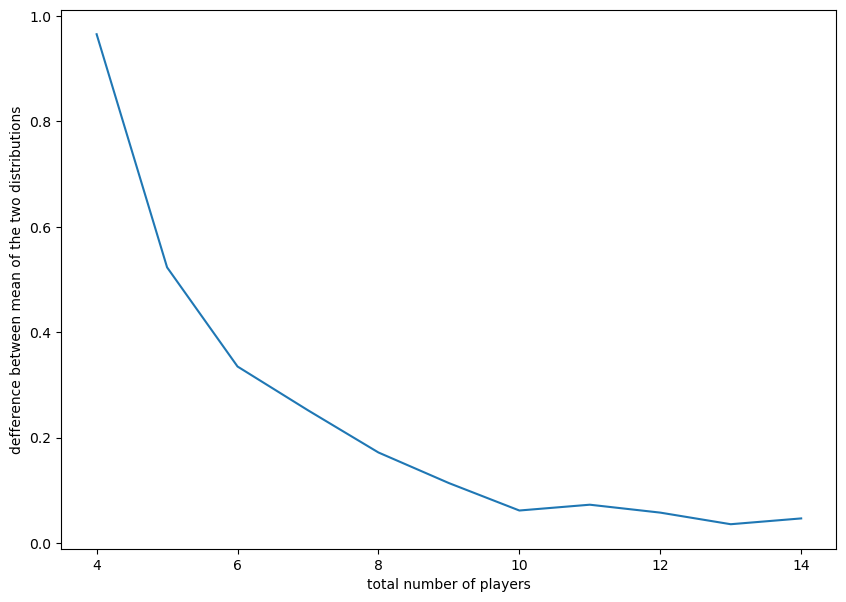

In [12]:
# check for the difference 

players_number = np.arange(4, 15)

fig, ax = plt.subplots(figsize =(10, 7))

# plot the different between the distribution
Diff_List = []
for i in players_number:
    gap = np.arange(1000)
    p_gap = np.arange(1000)
    for k in range(1000):
        cards = sample_cards(100, n = i, k = 6)
        p_gap[k] = player_large_gap(cards, i, 6)
        gap[k] = large_gap(cards)
            
    Diff_List.append(abs(np.mean(gap) - np.mean(p_gap)))
    

plt.plot(players_number, Diff_List)
plt.xlabel('total number of players')
plt.ylabel('defference between mean of the two distributions')
plt.show() 


From the plots above, with a fixed total number of cards and number of cards per player, we observed that as the total number of players increases, the difference between the two distributions decreases and approach to 0.

### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

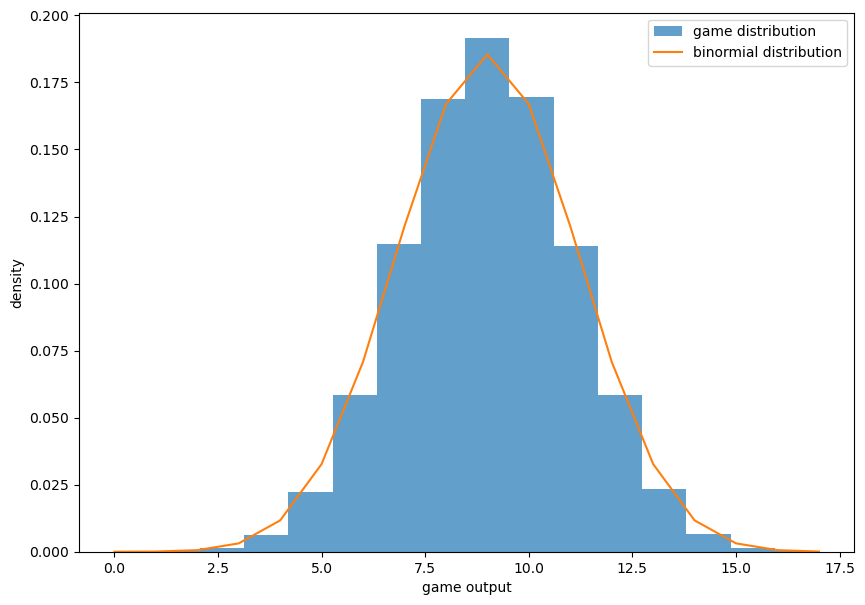

In [13]:
# To Do cell
from scipy.stats import binom
# in binormial distributiuon, E(x) = np, then p = E(x)/n

fig, ax = plt.subplots(figsize =(10, 7))
def sample_game(cards, N):
    '''
    derive something that has Binomial distribution of the game 
    
    Input:
     cards: all cards of each player
     N: total number of cards
     
    Output:
     number of cards (integer) that smaller than the target N/2 (binormial p= 0.5)
    '''
    # set a probability to get success
    target = N/2
    out = np.sum(cards <= target)
    return out

p_list = []
# simulate multiple times
for i in range(100000):
    cards = sample_cards(100, 6, 3)
    p_list.append(sample_game(cards, N = 100))
    
# generate binormial distribution with p = 0.5
x = np.arange(0, 18)
pmf_values = binom.pmf(np.arange(0, 18), 18, 0.5)

ax.hist(p_list, bins = 15, alpha = 0.7, density = True, label = "game distribution")
plt.plot(x, pmf_values,
         label = "binormial distribution")
plt.xlabel('game output')
plt.ylabel('density')
plt.legend()
plt.show()

### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

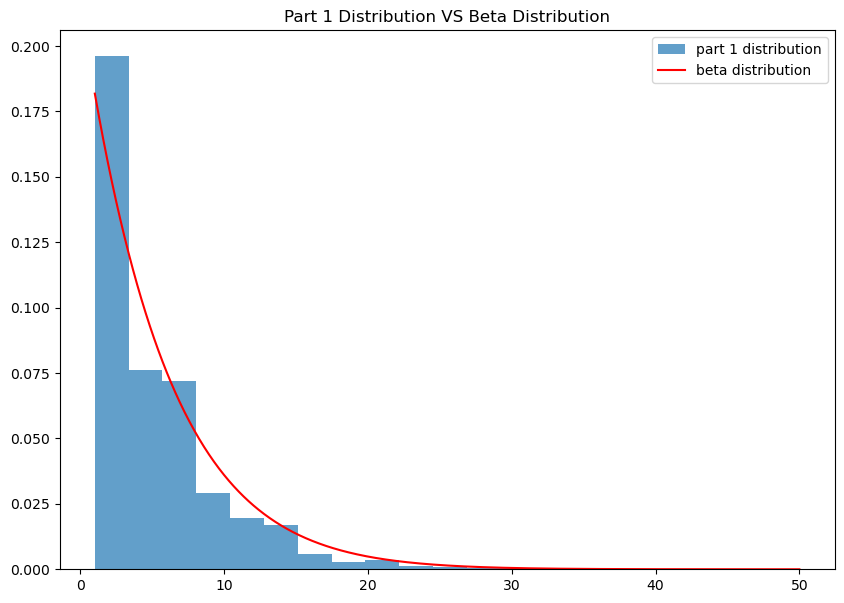

In [14]:
# To Do cell
from scipy.stats import beta
fig, ax = plt.subplots(figsize =(10, 7))

n = 10000
dist = np.arange(n)
for i in np.arange(n):
    cards = sample_cards(100, 6, 3)
    m = get_min(cards)
    dist[i] = m
    
ax.hist(dist, bins = 17, alpha = 0.7, density = True, label = "part 1 distribution")


# generate beta distribution
# k = 1 since we want the smallest card in the game
# n = 18, then n+1-k = 18

x = np.linspace(1, 50, 1000) 
pdf_values = beta.pdf(x, 1, 18, loc = 1, scale = 99)

# Plotting
plt.plot(x, pdf_values, '-r', label= "beta distribution")
plt.title("Part 1 Distribution VS Beta Distribution")
plt.legend()
plt.show()

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

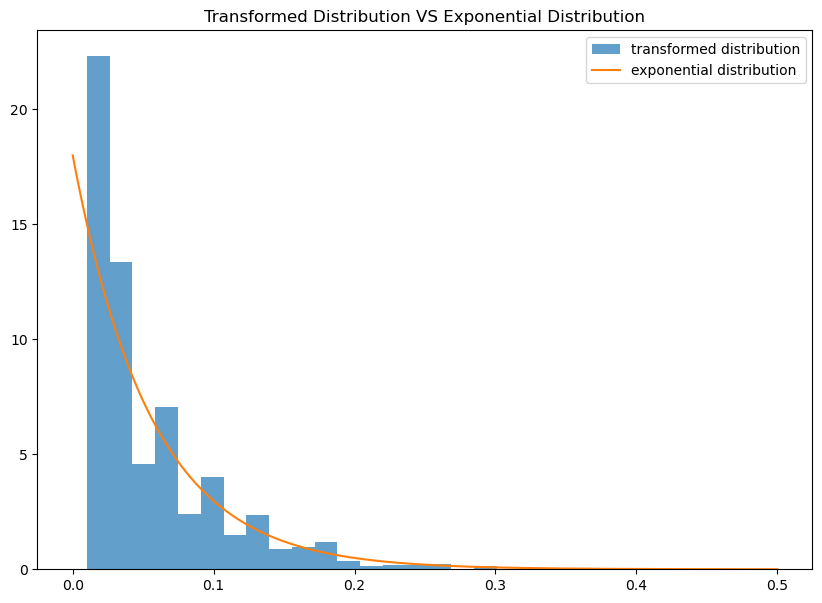

In [15]:
n = 6
k = 3

U1 = np.arange(1000)
for i in np.arange(1000):
    cards = sample_cards(100, n, k)
    m = get_min(cards)
    U1[i] = m
    
# apply the function of X    
X = -np.log(1 - (U1 / 100))


fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(X, bins = 18, alpha = 0.7, density = True, label = "transformed distribution")

# generate exponential diatribution
lamb = n*k
x = np.linspace(0, 0.5, 1000) 
pdf_value = lamb * np.exp(-lamb * x) 

plt.plot(x, pdf_value, label="exponential distribution")

plt.title("Transformed Distribution VS Exponential Distribution")
plt.legend()
plt.show()

### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

In [16]:
# sample with replacement
def rep_sample_cards(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    In this function, sampling with replacement
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=True)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards


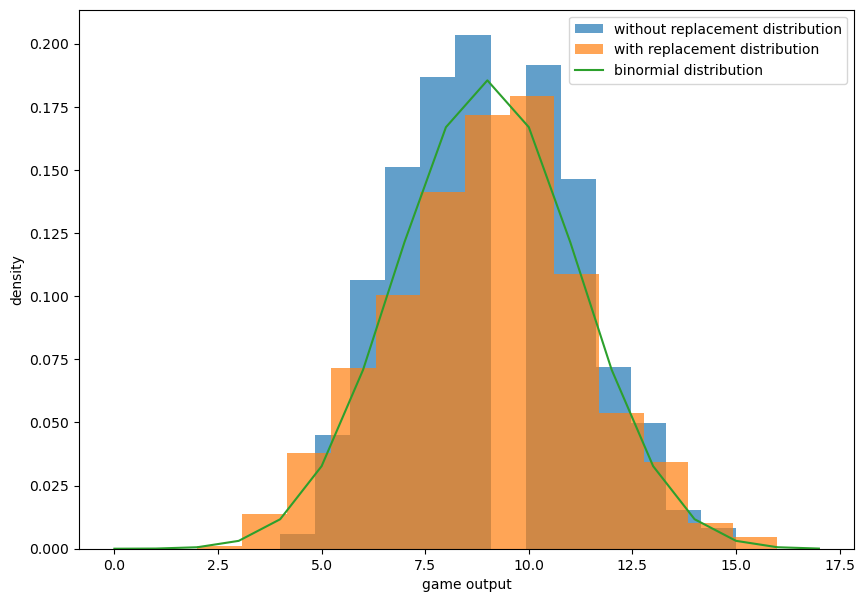

Difference between mean of 2 distributiuons: 0.016000000000000014


In [17]:
# binormial Distribution

fig, ax = plt.subplots(figsize =(10, 7))

p_list = []
replace_p_list = []

N = 100000
for i in range(1000):
    cards = sample_cards(N, 6, 3)
    p_list.append(sample_game(cards, N = N))
    replace_cards = rep_sample_cards(N, 6, 3)
    replace_p_list.append(sample_game(replace_cards, N = N))
    
ax.hist(p_list, bins = 13, alpha = 0.7, density = True, label = "without replacement distribution")
ax.hist(replace_p_list, bins = 13, alpha = 0.7, density = True, label = "with replacement distribution")


x = np.arange(0, 18)
pmf_values = binom.pmf(np.arange(0, 18), 18, 0.5)
plt.plot(x, pmf_values, label = "binormial distribution")
plt.xlabel('game output')
plt.ylabel('density')
plt.legend()
plt.show()

Diff = abs(np.mean(replace_p_list) - np.mean(p_list))
print("Difference between mean of 2 distributiuons:", Diff)

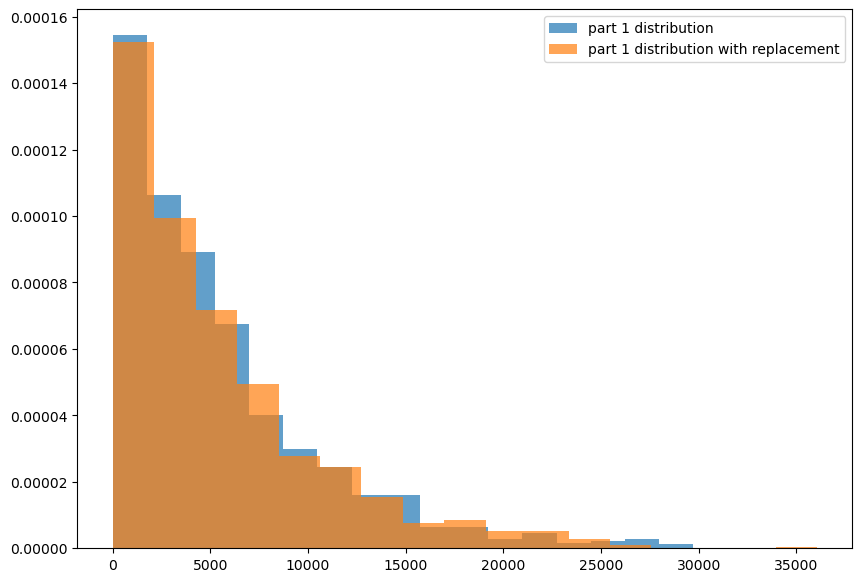

In [18]:
# Beta distribution
fig, ax = plt.subplots(figsize =(10, 7))

n = 1000
N = 100000
dist = np.arange(n)
rep_dist = np.arange(n)
# simulate multiple times
for i in np.arange(n):
    # get distribution draw cards without replacement
    cards = sample_cards(N, 6, 3)
    m = get_min(cards)
    dist[i] = m
    
    # get distribution draw cards with replacement
    replace_cards = rep_sample_cards(N, 6, 3)
    rm = get_min(replace_cards)
    rep_dist[i] = rm

ax.hist(dist, bins = 17, alpha = 0.7, density = True, label = "part 1 distribution")
ax.hist(rep_dist, bins = 17, alpha = 0.7, density = True, label = "part 1 distribution with replacement")


plt.legend()
plt.show()

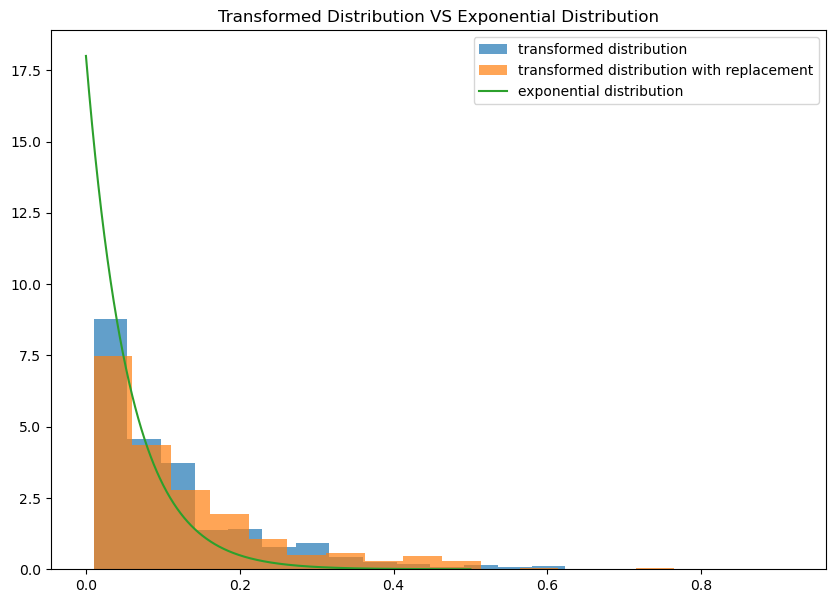

In [19]:
# Exponential distribution
n = 6
k = 3
N = 200

U1 = np.arange(1000)
r_U1 = np.arange(1000)
for i in np.arange(1000):
    # get distribution draw cards without replacement
    cards = sample_cards(N, n, k)
    m = get_min(cards)
    U1[i] = m
    
    # get distribution draw cards with replacement
    r_cards = rep_sample_cards(N, n, k)
    r_m = get_min(r_cards)
    r_U1[i] = r_m
    
X = -np.log(1 - (U1 / 100))
r_X = -np.log(1 - (r_U1 / 100))

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(X, bins = 18, alpha = 0.7, density = True, label = "transformed distribution")
ax.hist(r_X, bins = 18, alpha = 0.7, density = True, label = "transformed distribution with replacement")

# generate exponential diatribution
lamb = n*k
x = np.linspace(0, 0.5, 1000) 
pdf_value = lamb * np.exp(-lamb * x) 

plt.plot(x, pdf_value, label="exponential distribution")

plt.title("Transformed Distribution VS Exponential Distribution")
plt.legend()
plt.show()

According to the plots, we can conclude that when the value of N is nuch larger than n*k, the distribution that with replacement and without replace ment approached to each other.

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: 
- Member No2: 
- Member No3: